# A Quick Look at Keras Deep Learning Framework

In this a quick overview of applying a convolutional neural net to solving the problem of mnist. We are using [Keras](https://keras.io/) which is a high-level neural networks API, written in Python. To [install Keras](https://keras.io/#installation) you can use the following conda commands. We install Tensorflow and then Keras:
```
pip install tensorflow
pip install keras
```
Depending on your system, the default backend of keras might be Theano. We will be using [Tensorflow backend](https://keras.io/backend/).

In [1]:
import numpy as np
import matplotlib.pylab as plt

# import keras and its sub-libraries useful for us
import keras
from keras import regularizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Keras allow us to load MNIST easily and preprocess it for learning.

In [2]:
# number of images used for calculating gradient
batch_size = 128

# number of loops over the whole training data 
epochs = 10

num_classes = 10

# input image dimensions
width = 28
height = 28

# keras automatically splits the data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the flatten images into 28 by 28 images and normalize the intensities
x_train = x_train.reshape(x_train.shape[0], height, width, 1)/255.0
x_test = x_test.reshape(x_test.shape[0], height, width, 1)/255.0

# convert class vectors to binary class matrices, more on this later
y_train_1hot = keras.utils.to_categorical(y_train, num_classes)
y_test_1hot = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 2s 0us/step


Let us visualize a few images from the data to make sure both the images and the labels are correct.

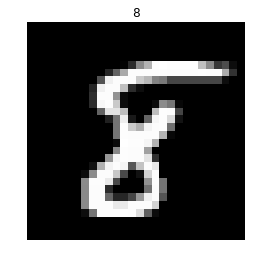

In [3]:
# choose a random image
k = np.random.choice(len(x_train))

# visualize the random chosen image
plt.imshow(x_train[k][:,:,0] , cmap='gray')
# print the image label/class
plt.title(y_train[k])
plt.axis('off')
plt.show()

Here we create a convolutional neural network that will learn hand-written images on its own. Later in the course, we will learn about the details of how this model is created.

In [4]:
# specify the dimensions of our input
input_shape = (height, width, 1)

In [11]:
# type of the model
model = Sequential()

# first convolutional layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))


model.add(Conv2D(64, (3, 3), activation='relu'))
# maxpooling and faltten for using dense layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

# dense layer with a l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# output layer using softmax output
model.add(Dense(num_classes, activation='softmax'))

Next, we define our optimizer which is a simple gradient descent in this case with the learning rate of $0.001$.

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.005),
              metrics=['accuracy'])

We can see the structure of the model by calling the `summary()` function.

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               991360    
__________

Finally, we are ready to train our model on the data. You can see the performance of the model by following both the cost and percentage of correct answers (accuracy) in the training data. At the end of each epoch, we can see the performance of the model on the test set.

In [14]:
history = model.fit(x_train, y_train_1hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_1hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 162s 3ms/step - loss: 1.5361 - acc: 0.6288 - val_loss: 0.5989 - val_acc: 0.9007
Epoch 2/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.6281 - acc: 0.8846 - val_loss: 0.5217 - val_acc: 0.9211
Epoch 3/10
60000/60000 [==============================] - 695s 12ms/step - loss: 0.5542 - acc: 0.9083 - val_loss: 0.4677 - val_acc: 0.9363
Epoch 4/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.5013 - acc: 0.9226 - val_loss: 0.4351 - val_acc: 0.9444
Epoch 5/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.4596 - acc: 0.9358 - val_loss: 0.4025 - val_acc: 0.9534
Epoch 6/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.4271 - acc: 0.9449 - val_loss: 0.3779 - val_acc: 0.9605
Epoch 7/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.4006 - acc: 0.9522 - val_loss: 0.3642 -

After training, we can visualize the accuracy and loss curves to have a better understanding of our model performance. Also, it would be useful for hyper parameter tuning.

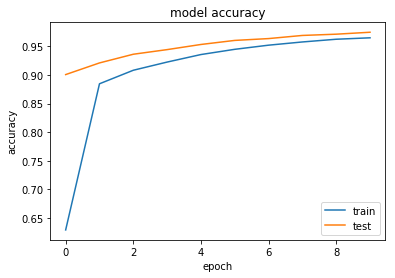

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

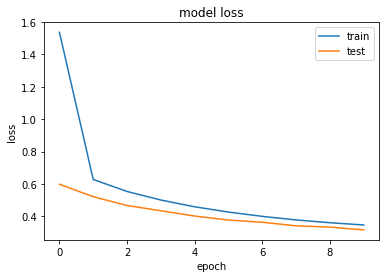

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Our model performs very well on MNIST. This model can be tuned to even higher accuracies but at this state, the more important thing is to understand how it works.

Based on numbers, we can see that our model is capable of recongizing the digits from around 97% of the images. It would feel good to see our model in action so let us show the model a few images and ask for the corresponding digit.

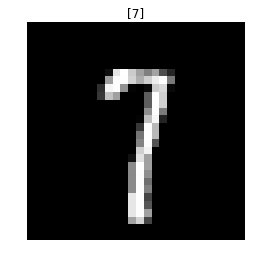

In [17]:
k = np.random.choice(len(x_test))

plt.imshow(x_train[k][:,:,0] , cmap='gray')

image = x_train[k].reshape(1,28,28,1)

# our model guess for the label of the image
label = model.predict_classes(image,verbose=False)

plt.title(str(label))
plt.axis('off')
plt.show()

Here we use opencv3 to load and preprocess an image of a digit that we created ourselves to test our model in real world.

To install opencv you can run the following command in your terminal
```
conda install -c menpo opencv3
```

In [ ]:
# import opencv to work with the image data
import cv2

In [ ]:
# read the image into a numpy array
im = cv2.imread('Untitled.jpg')

# show image
plt.imshow(im)

# reshape the array to the correct format for our model
gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray_image = gray_image.reshape(1,28,28,1)

# our model guess for the label of the image
label = model.predict_classes(image,verbose=False)

plt.title(str(label))
plt.axis('off')
plt.show()